In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn import metrics
from scipy.optimize import minimize
import pylab
from mpl_toolkits.mplot3d import Axes3D


In [2]:
def generateDataFromGMM(N,gmmParameters):
#    Generates N vector samples from the specified mixture of Gaussians
#    Returns samples and their component labels
#    Data dimensionality is determined by the size of mu/Sigma parameters
    priors = gmmParameters['priors'] # priors should be a row vector
    meanVectors = gmmParameters['meanVectors']
    covMatrices = gmmParameters['covMatrices']
    n = meanVectors.shape[0] # Data dimensionality
    C = len(priors) # Number of components
    x = np.zeros((n,N))
    labels = np.zeros((1,N))
    # Decide randomly which samples will come from each component
    u = np.random.random((1,N))
    thresholds = np.zeros((1,C+1))
    thresholds[:,0:C] = np.cumsum(priors)
    thresholds[:,C] = 1
    for l in range(C):
        indl = np.where(u <= float(thresholds[:,l]))
        Nl = len(indl[1])
        labels[indl] = (l+1)*1
        u[indl] = 1.1
        x[:,indl[1]] = np.transpose(np.random.multivariate_normal(meanVectors[:,l], covMatrices[:,:,l], Nl))
        
    return x,labels

In [3]:
def generateData(N):
    gmmParameters = {}
    gmmParameters['priors'] = [.3,.4,.3] # priors should be a row vector
    gmmParameters['meanVectors'] = np.array([[-10, 0, 10], [0, 0, 0], [10, 0, -10]])
    gmmParameters['covMatrices'] = np.zeros((3, 3, 3))
    gmmParameters['covMatrices'][:,:,0] = np.array([[1, 0, -3], [0, 1, 0], [-3, 0, 15]])
    gmmParameters['covMatrices'][:,:,1] = np.array([[8, 0, 0], [0, .5, 0], [0, 0, .5]])
    gmmParameters['covMatrices'][:,:,2] = np.array([[1, 0, -3], [0, 1, 0], [-3, 0, 15]])
    x,labels = generateDataFromGMM(N,gmmParameters)
    return x

In [4]:
def hw2q2():
    Ntrain = 100
    data = generateData(Ntrain)
    #plot3(data[0,:],data[1,:],data[2,:])
    xTrain = data[0:2,:]
    yTrain = data[2,:]
    
    Ntrain = 1000
    data = generateData(Ntrain)
    #plot3(data[0,:],data[1,:],data[2,:])
    xValidate = data[0:2,:]
    yValidate = data[2,:]
    
    return xTrain,yTrain,xValidate,yValidate

In [5]:
def mse(w, X, y):
    c = X.dot(w)
    return np.sum((y - c) ** 2) / y.shape[0]

In [6]:
def cubic_function(w, x1, x2):
    return (w[0] + w[1] * x1 + w[2] * x2 +
        w[3] * x1**2 + w[4] * x1 * x2 +
        w[5] * x2**2 + w[6] * x1**3 + w[7] * x2**3 +
        w[8] * x1**2 * x2 + w[9] * x1 * x2**2
    )

In [7]:
def negative_log_posterior(X, y, gamma, sigma_squared = 1):
    reg = 1 / gamma * sigma_squared * np.identity(X.shape[1])
    return np.linalg.inv(X.T.dot(X) + reg).dot(X.T.dot(y))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculated MSE:  7.862804689737211


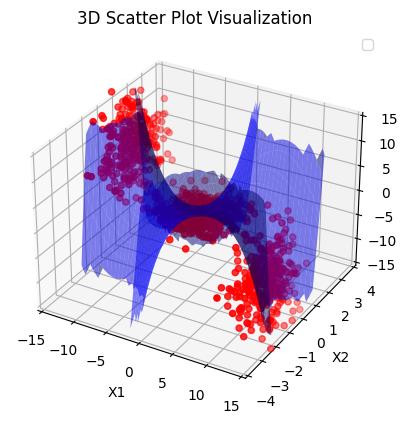

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Best Gamma:  5.441714286865887e-07
MSE:  4.1839083289192835


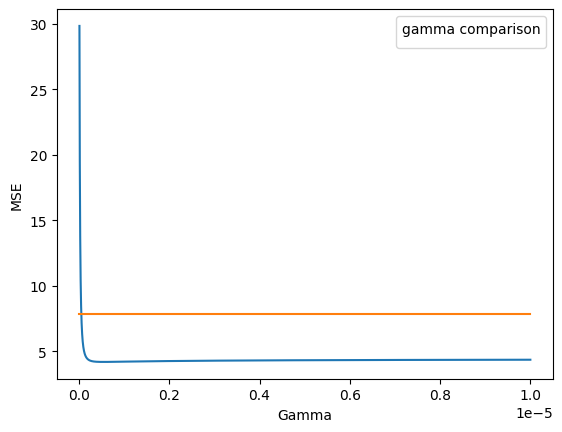

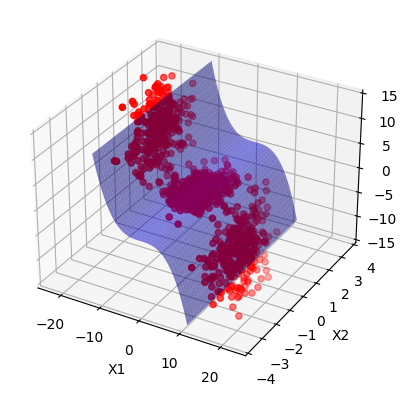

In [8]:
xtrain, ytrain, xval, yval = hw2q2()
df = pd.DataFrame(xtrain)
df.to_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 2\xtrain.csv', index=True)
df = pd.DataFrame(ytrain)
df.to_csv(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 2\ytrain.csv', index=True)
xtrain = xtrain.transpose()
ytrain = ytrain.transpose()
xval = xval.transpose()
yval = yval.transpose()
# print("Printing Xval", xval)
# print("Printing yval", yval)
#ML
#cubic function is 1, x1, x2, x1^2, x1x2, x2^2, x1^3, x2^3, x1^2x2, x1x2^2
#training data
X_Aug = np.column_stack((np.ones(100), xtrain)) 
X1 = X_Aug[:,1]
X2 = X_Aug[:,2]
X_cubic = np.column_stack((X_Aug, X1 * X1, X1 * X2, X2 * X2,
                                X1 * X1 * X1, X1 * X1 * X2, X1 * X2 * X2, X2 * X2 * X2))

#validation data
X_Aug_temp = np.column_stack((np.ones(1000), xval)) 
X1 = X_Aug_temp[:,1]
X2 = X_Aug_temp[:,2]
X_cubic_val = np.column_stack((X_Aug_temp, X1 * X1, X1 * X2, X2 * X2,
                                X1 * X1 * X1, X1 * X1 * X2, X1 * X2 * X2, X2 * X2 * X2))


T_X_cubic = X_cubic.transpose()
#applying the formula derived in my write up
theta = np.linalg.inv(T_X_cubic.dot(X_cubic)).dot(T_X_cubic).dot(ytrain)
#applying the formula derived in my write up
theta = np.linalg.inv(T_X_cubic.dot(X_cubic)).dot(T_X_cubic).dot(ytrain)
mml = mse(theta, X_cubic_val, yval)
print("Calculated MSE: ", mml)
np.savetxt(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 2\mml.txt',[mml],header ='Mean Squared Error')

x1s = np.linspace(-15,15,100)
x2s = np.linspace(-4,4,100)
X, Y = np.meshgrid(x1s, x2s)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(xval[:,0], xval[:,1], yval, c='r', marker='o')

# Labels and title
ax.legend(loc='best') 
ax.set_title('3D Scatter Plot Visualization')
ax.set_xlabel('xval')
ax.set_ylabel('xval')
ax.set_zlabel('yval')
plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 2\3D Scatter Plot Visualization.png')
# plt.show()



Z = cubic_function(theta, X, Y)
mask = np.logical_or(Z < -15, Z > 15)
Z[mask] = np.nan  # Set values outside the desired range to NaN
ax.plot_surface(X, Y, Z, alpha=0.5, color='blue', label='Cubic Function')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_xlim(-15, 15)
ax.set_ylim(-4, 4)
ax.set_zlim(-15, 15)
# ax.legend()
plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 2\cubic function.png')
plt.show()


gamma = 10 ** np.linspace(-8, -5, 1000)
low = 10000000
mses = []
mls = []
best_theta = []
for g in gamma:
    w = negative_log_posterior(X_cubic, ytrain, g)
    m = mse(w, X_cubic_val, yval)
    mses.append(m)
    mls.append(mml)
    if(m < low):
        low = m
        best_theta = w

print("Best Gamma: ", gamma[np.argmin(mses)])
print("MSE: ", np.min(mses))
np.savetxt(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 2\gama.txt',[gamma[np.argmin(mses)]],header ='Best Gamma')
np.savetxt(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 2\mse.txt',[np.min(mses)],header ='Mease Square')


plt.plot(gamma, mses)
plt.plot(gamma, mls)
plt.xlabel('Gamma')
plt.ylabel('MSE')
# plt.grid(True, linestyle='--', alpha= 0.5)
plt.legend(title = 'gamma comparison')
plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 2\gamma vs mses.png')
plt.show()



x1s = np.linspace(-15,15,100)
x2s = np.linspace(-4,4,100)
X, Y = np.meshgrid(x1s, x2s)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xval[:,0], xval[:,1], yval, c='r', marker='o')

Z = cubic_function(best_theta, X, Y)
mask = np.logical_or(Z < -15, Z > 15)
Z[mask] = np.nan  # Set values outside the desired range to NaN

ax.plot_surface(X, Y, Z, alpha=0.5, color='blue', label='Cubic Function')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_xlim(-25, 25)
ax.set_ylim(-4, 4)
ax.set_zlim(-15, 15)
# plt.legend(title = 'Cubic Function')
plt.savefig(r'C:\Users\anifa\Desktop\GITB\EECE5644-Intro_to_ML\Assigment_2\Problem 2\cubic function_2.png')
plt.show()
